In [0]:
# Importing necessary paackages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

seed = 4353

In [5]:
data = pd.read_csv('Heart.csv')
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [6]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [7]:
print("Dataset has {} samples and {} attributes".format(*data.shape))

Dataset has 303 samples and 14 attributes


We have 13 feature columns and target variable 'AHD'

    Sex, ChestPain, Fbs, RestECG, ExAng, Slope, Ca Thal are Categorical Features

    Age, RestBP, Chol, MaxHR and Oldpeak are continuous variables.

This dataset is the same which is available on UCI Heart disease dataset for cleveland.

Description of attributes:

sex: sex (1 = male; 0 = female)

Ca = number of major vessels (0-3) colored by flourosopy

Restbps: resting blood pressure (in mm Hg on admission to the
hospital)


Chol: serum cholestoral in mg/dl


Fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


Restecg: resting electrocardiographic results

    Value 0: normal

    Value 1: having ST-T wave abnormality (T wave inversions and/or ST
    elevation or depression of > 0.05 mV)

    Value 2: showing probable or definite left ventricular hypertrophy
    by Estes' criteria


Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect. 
      The heart status as retrieved from Thallium test, (normal, fixed defect, reversible defect) (discrete)


Exang: exercise induced angina (1 = yes; 0 = no)


Oldpeak = ST depression induced by exercise relative to rest


Slope: the slope of the peak exercise ST segment

    Value 1: upsloping

    Value 2: flat

    Value 3: downsloping


MaxHR = maxium heart rate


AHD: Atherosclerotic Heart Disease


## Exploratory Data Analysis (EDA)

In [8]:
data.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [9]:
data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [10]:
data.describe(include= 'all')

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,303.000000,303.000000,303,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301,303
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2
top,NaN,NaN,asymptomatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,No
freq,NaN,NaN,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166,164
mean,54.438944,0.679868,NaN,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,NaN,NaN
std,9.038662,0.467299,NaN,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,NaN,NaN
min,29.000000,0.000000,NaN,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
25%,48.000000,0.000000,NaN,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
50%,56.000000,1.000000,NaN,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,NaN,NaN
75%,61.000000,1.000000,NaN,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,NaN,NaN


In [11]:
# Check if the dataset has missing values
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

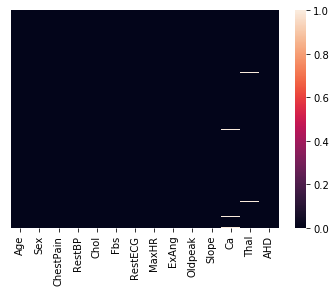

In [12]:
# Check for missing values using heatmap
sns.heatmap(data.isnull(), yticklabels= False)

### Data Cleaning --> for features 'Ca' and 'Thal'

In [17]:
# Analyse 'Ca' data
pd.crosstab(index= data['AHD'], columns= data['Ca'])

Ca,0.0,1.0,2.0,3.0
AHD,,,,
No,130,21,7,3
Yes,46,44,31,17


From the table above, most of the outcomes corresponds to Ca = 0.0.

Let's fill missing values from 'Ca' with 0.0

In [0]:
data['Ca'].fillna(0.0, inplace = True)

In [19]:
# Analyse 'Thal' data
data['Thal'].describe(include= 'all')

count        301
unique         3
top       normal
freq         166
Name: Thal, dtype: object

From the table above, the top value for feature 'Thal' is 'normal'.

Let's fill missing values from 'Thal' with 'normal'

In [0]:
data['Thal'].fillna('normal', inplace = True)

In [21]:
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [22]:
# Check if the data is balanced
AHD_counts = data['AHD'].value_counts()
AHD_counts

No     164
Yes    139
Name: AHD, dtype: int64

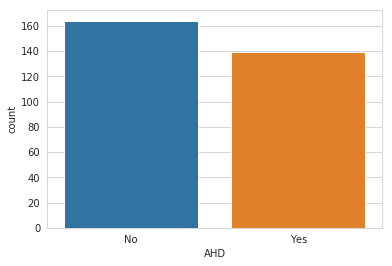

In [23]:
sns.set_style('whitegrid')
sns.countplot(x= 'AHD', data= data)

In [24]:
print("% of patients diagnosed with AHD: ",round(AHD_counts['Yes']*100/len(data), 2))
print("% of patients not diagnosed with AHD: ",round(AHD_counts['No']*100/len(data), 2))

% of patients diagnosed with AHD:  45.87
% of patients not diagnosed with AHD:  54.13


In [0]:
# List of categorical and numerical variables
cat_var = ['Sex', 'ChestPain', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Ca', 'Thal']
num_var = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']

In [26]:
# Find the correlation between Numerical Variables
corr_df=data[num_var]  #New dataframe to calculate correlation between numerical features
cor= corr_df.corr(method='pearson')
print(cor)

              Age    RestBP      Chol     MaxHR   Oldpeak
Age      1.000000  0.284946  0.208950 -0.393806  0.203805
RestBP   0.284946  1.000000  0.130120 -0.045351  0.189171
Chol     0.208950  0.130120  1.000000 -0.003432  0.046564
MaxHR   -0.393806 -0.045351 -0.003432  1.000000 -0.343085
Oldpeak  0.203805  0.189171  0.046564 -0.343085  1.000000


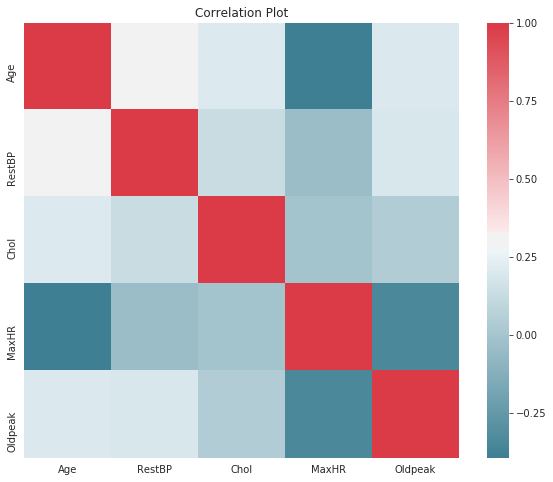

In [27]:
# Visualizing the correlation
fig, ax =plt.subplots(figsize=(10, 8))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

There is no strong correlation between any two variables

Understanding the  relationship between categorical variables and target variable using chi-square test

In [28]:
#cat_var = ['Sex', 'ChestPain', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Ca', 'Thal']
for cat in cat_var:
  cst=chi2_contingency(pd.crosstab(data['AHD'], data[cat]))
  print('P-value for ' + cat + ' : ',cst[1])

P-value for Sex :  2.666712348180942e-06
P-value for ChestPain :  1.2517106007837616e-17
P-value for Fbs :  0.7812734067063785
P-value for RestECG :  0.006566523814217354
P-value for ExAng :  1.413788096718085e-13
P-value for Slope :  1.1428845467526982e-10
P-value for Ca :  1.174259428031822e-15
P-value for Thal :  1.1098857420294782e-18


It could be noted that P-value for Fbs is 0.7812 which is greater the 0.05 (significance level - alpha).

Thus the Null Hypothesis H0 : "There is NO relationship between 'Fbs' and 'AHD' " ---> failed to reject

This implies that there is NO relationship between 'Fbs' and 'AHD'. So 'fbs' column could be dropped.

In [0]:
# Drop fbs column
data.drop('Fbs', axis= 1, inplace= True)

Let's check how feature 'Sex' impacts the outcome 'AHD'

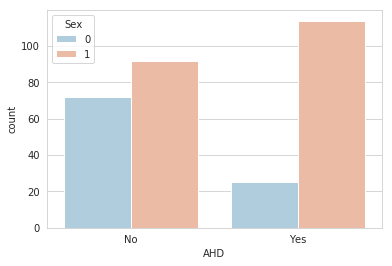

In [30]:
sns.set_style('whitegrid')
sns.countplot(x= 'AHD', hue = 'Sex', data= data, palette= 'RdBu_r')

It can be noted from the above plot that Male patients have higher probability of 'AHD' than Female patients

Let's now understand how cholestoral 'Chol' impacts 'AHD'

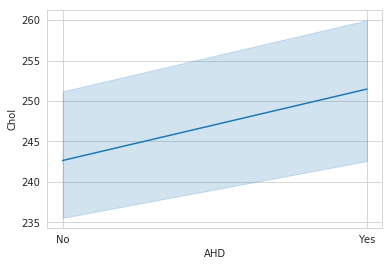

In [32]:
sns.set_style('whitegrid')
sns.lineplot(x= 'AHD', y = 'Chol', data= data, palette= 'RdBu_r')

It can be noted that an increased level of cholestrol 'Chol' may lead to 'AHD'

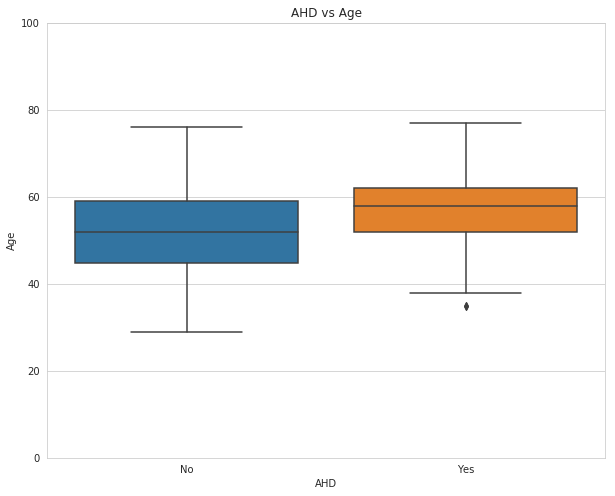

In [37]:
fig, ax=plt.subplots(1,figsize=(10,8))
sns.boxplot(x='AHD',y='Age', data= data)
ax.set_ylim(0,100)
plt.title("AHD vs Age")
plt.show()

From the above graph,  it is evident that 'AHD' is most likely to be noticed in people aged above 50 years (25 % of people with 'AHD' are below 50 years and 75% of the people with 'AHD' are above 50years)

### Let's now deal with the categorical variables 'ChestPain' and 'Thal' using One Hot Encoding (OHE)

In [38]:
ChestPain_dummies = pd.get_dummies(data['ChestPain'], drop_first= True) # Drop the first column as it is well represented by other columns
ChestPain_dummies.head()

,nonanginal,nontypical,typical
0,0,0,1
1,0,0,0
2,0,0,0
3,1,0,0
4,0,1,0


In [39]:
Thal_dummies = pd.get_dummies(data['Thal'], drop_first= True)
Thal_dummies.head()

,normal,reversable
0,0,0
1,1,0
2,0,1
3,1,0
4,1,0


In [0]:
cat_var_drop = ['ChestPain', 'Thal'] # Drop the original categorical variables 'ChestPain' and 'Thal'
data.drop(cat_var_drop, axis= 1, inplace= True)

In [41]:
data = pd.concat([data, ChestPain_dummies, Thal_dummies], axis = 1)
data.head()

,Age,Sex,RestBP,Chol,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,nonanginal,nontypical,typical,normal,reversable
0,63,1,145,233,2,150,0,2.3,3,0.0,No,0,0,1,0,0
1,67,1,160,286,2,108,1,1.5,2,3.0,Yes,0,0,0,1,0
2,67,1,120,229,2,129,1,2.6,2,2.0,Yes,0,0,0,0,1
3,37,1,130,250,0,187,0,3.5,3,0.0,No,1,0,0,1,0
4,41,0,130,204,2,172,0,1.4,1,0.0,No,0,1,0,1,0


In [42]:
X = data.drop('AHD', axis = 1) 
X.head()

,Age,Sex,RestBP,Chol,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,nonanginal,nontypical,typical,normal,reversable
0,63,1,145,233,2,150,0,2.3,3,0.0,0,0,1,0,0
1,67,1,160,286,2,108,1,1.5,2,3.0,0,0,0,1,0
2,67,1,120,229,2,129,1,2.6,2,2.0,0,0,0,0,1
3,37,1,130,250,0,187,0,3.5,3,0.0,1,0,0,1,0
4,41,0,130,204,2,172,0,1.4,1,0.0,0,1,0,1,0


In [43]:
y = data['AHD']
y.head()

0     No
1    Yes
2    Yes
3     No
4     No
Name: AHD, dtype: object

### Normalize the numerical columns using standard scaler.

Features normalized with standard scaler method will have a mean = 0 and standard deviation = 1

In [0]:
scaler = StandardScaler()

X_toNormalize = X[['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']]
X_normalized = scaler.fit_transform(X_toNormalize)

In [0]:
X_normal_df = pd.DataFrame(X_normalized)
X_normal_df.columns = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']

In [0]:
X = X.drop(['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak'], axis = 1)

In [47]:
X = pd.concat([X, X_normal_df], axis = 1)
X.head()

,Sex,RestECG,ExAng,Slope,Ca,nonanginal,nontypical,typical,normal,reversable,Age,RestBP,Chol,MaxHR,Oldpeak
0,1,2,0,3,0.0,0,0,1,0,0,0.948726,0.757525,-0.264900,0.017197,1.087338
1,1,2,1,2,3.0,0,0,0,1,0,1.392002,1.611220,0.760415,-1.821905,0.397182
2,1,2,1,2,2.0,0,0,0,0,1,1.392002,-0.665300,-0.342283,-0.902354,1.346147
3,1,0,0,3,0.0,1,0,0,1,0,-1.932564,-0.096170,0.063974,1.637359,2.122573
4,0,2,0,1,0.0,0,1,0,1,0,-1.489288,-0.096170,-0.825922,0.980537,0.310912


In [0]:
# Split the data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= seed)

# Model Selection

### Cross Validation Techniques

Repeated k-fold cross validation technique is used.

Repeated k-fold CV is k-fold CV repeated for the number of iterations specified, with k-fold containing different data at each iteration.

In [0]:
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state= seed)

### Grid Search Cross Validation

This is used for estimating the parameters of the model which gives the best performance.

This is called as 'Hyper-parameter Tuning'

### Logistic Regression

In [0]:
log_reg = LogisticRegression()

In [0]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid = GridSearchCV(estimator= log_reg, param_grid= param_grid, scoring= 'accuracy', cv= rkf)
# fit the train data 
grid.fit(x_train, y_train)

print('Estimator: ', grid.best_estimator_)
print('Best params : \n', grid.best_params_)
print('Output Classes: ', grid.classes_)
print('Training Accuracy: ', grid.best_score_)

In [53]:
# Predictions on test data
predictions = grid.predict(x_test)

# Model evaluation
print(classification_report(y_true= y_test, y_pred= predictions))
logit_accuracy = round((accuracy_score(y_true= y_test, y_pred= predictions) * 100), 2)
print('Test Accuracy % : ', logit_accuracy)

              precision    recall  f1-score   support

          No       0.83      0.86      0.84        28
         Yes       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Test Accuracy % :  85.25


### K-Nearest Neighbor Classifier

In [0]:
knn = KNeighborsClassifier()

In [0]:
n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist_metric = ['minkowski']
p_root = [1, 2]

parameters = dict(n_neighbors = n_neighbors,
                  metric = dist_metric,
                  p = p_root)

In [56]:
grid = GridSearchCV(estimator= knn, param_grid= parameters, scoring= 'accuracy', cv= rkf)
# fit the train data 
grid.fit(x_train, y_train)

print('Estimator: ', grid.best_estimator_)
print('Best params : \n', grid.best_params_)
print('Output Classes: ', grid.classes_)
print('Training Accuracy: ', grid.best_score_)

Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=1,
                     weights='uniform')
Best params : 
 {'metric': 'minkowski', 'n_neighbors': 19, 'p': 1}
Output Classes:  ['No' 'Yes']
Training Accuracy:  0.8181818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [57]:
# Predictions on test data
predictions = grid.predict(x_test)

# Model evaluation
print(classification_report(y_true= y_test, y_pred= predictions))
knn_accuracy = round((accuracy_score(y_true= y_test, y_pred= predictions) * 100), 2)
print('Test Accuracy % : ', knn_accuracy)

              precision    recall  f1-score   support

          No       0.89      0.86      0.87        28
         Yes       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Test Accuracy % :  88.52


### Decision Tree Classifier

In [0]:
dtc = DecisionTreeClassifier(random_state= seed)

In [0]:
# Hyperparameter tuning using GridSearchCV for Decision Tree Classifier
param_grid = { 
    'max_depth': range(1, 20),
    'criterion' :['entropy', 'gini']
}

In [0]:
grid = GridSearchCV(estimator= dtc, param_grid= param_grid, scoring= 'accuracy', cv= rkf)

In [61]:
# fit the train data 
grid.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x7f515b2dbef0>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=4353,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gi

In [62]:
print('Estimator: ', grid.best_estimator_)
print('Best params : \n', grid.best_params_)
print('Output Classes: ', grid.classes_)
print('Training Accuracy: ', grid.best_score_)

Estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=4353, splitter='best')
Best params : 
 {'criterion': 'entropy', 'max_depth': 1}
Output Classes:  ['No' 'Yes']
Training Accuracy:  0.7644628099173554


In [0]:
# Predictions on test data
predictions = grid.predict(x_test)

In [64]:
# Model evaluation
print(classification_report(y_true= y_test, y_pred= predictions))
dtc_accuracy = round((accuracy_score(y_true= y_test, y_pred= predictions) * 100), 2)
print('Test Accuracy % : ', dtc_accuracy)

              precision    recall  f1-score   support

          No       0.72      0.75      0.74        28
         Yes       0.78      0.76      0.77        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

Test Accuracy % :  75.41


### Random Forest Classifier

In [0]:
rfc = RandomForestClassifier(random_state= seed)

In [0]:
# Hyperparameter tuning using GridSearchCV for RFC
param_grid = { 
    'max_depth': range(1, 20),
    'criterion' :['entropy', 'gini'],
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [67]:
grid = GridSearchCV(estimator= rfc, param_grid= param_grid, scoring= 'accuracy', cv= rkf)
# fit the train data 
grid.fit(x_train, y_train)

print('Estimator: ', grid.best_estimator_)
print('Best params : \n', grid.best_params_)
print('Output Classes: ', grid.classes_)
print('Training Accuracy: ', grid.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=4353,
                       verbose=0, warm_start=False)
Best params : 
 {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 300}
Output Classes:  ['No' 'Yes']
Training Accuracy:  0.8057851239669421


In [68]:
# Predictions on test data
predictions = grid.predict(x_test)

# Model evaluation
print(classification_report(y_true= y_test, y_pred= predictions))
rfc_accuracy = round((accuracy_score(y_true= y_test, y_pred= predictions) * 100), 2)
print('Test Accuracy % : ', rfc_accuracy)

              precision    recall  f1-score   support

          No       0.77      0.82      0.79        28
         Yes       0.84      0.79      0.81        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Test Accuracy % :  80.33


### Support Vector Machine Classifier (SVC)

In [0]:
svc = SVC(random_state= seed)

In [0]:
#Hyperparameter tuning using GridSearchCV for SVM 

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}] #Large Value of parameter C => small margin
                                                                     #Small Value of paramerter C => Large margin

In [71]:
grid = GridSearchCV(estimator= svc, param_grid= param_grid, scoring= 'accuracy', cv= rkf)
# fit the train data 
grid.fit(x_train, y_train)

# Model evaluation
print('Estimator: ', grid.best_estimator_)
print('Best params : \n', grid.best_params_)
print('Output Classes: ', grid.classes_)
print('Training Accuracy: ', grid.best_score_)

Estimator:  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=4353,
    shrinking=True, tol=0.001, verbose=False)
Best params : 
 {'C': 10, 'kernel': 'linear'}
Output Classes:  ['No' 'Yes']
Training Accuracy:  0.8333333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
# Predictions on test data
predictions = grid.predict(x_test)

print(classification_report(y_true= y_test, y_pred= predictions))
svc_accuracy = round((accuracy_score(y_true= y_test, y_pred= predictions) * 100), 2)
print('Test Accuracy % : ', svc_accuracy)

              precision    recall  f1-score   support

          No       0.80      0.86      0.83        28
         Yes       0.87      0.82      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Test Accuracy % :  83.61


# Model Comparision

In [0]:
model = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
acc = [logit_accuracy, knn_accuracy, dtc_accuracy, rfc_accuracy, svc_accuracy]

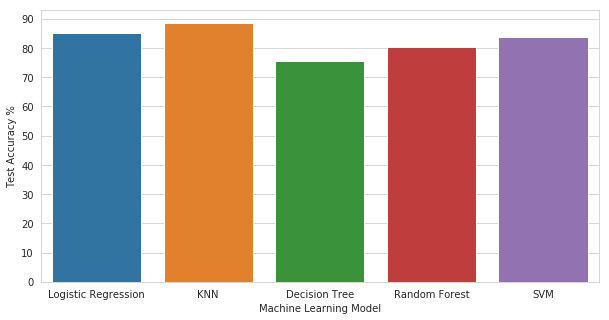

In [74]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Test Accuracy %")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model, y= acc)
plt.show()